In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url_train = 'https://raw.githubusercontent.com/aakasoc/Loan_Eligibility_Prediction/main/train.csv'

train = pd.read_csv(url_train)
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
url_test = 'https://raw.githubusercontent.com/aakasoc/Loan_Eligibility_Prediction/main/test.csv'

test = pd.read_csv(url_test)
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
train_original=train.copy()
test_original=test.copy()

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train.shape

(614, 13)

In [ ]:
test.shape

(367, 12)

In [ ]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
train['Loan_Status'].value_counts(normalize=True) 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [ ]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

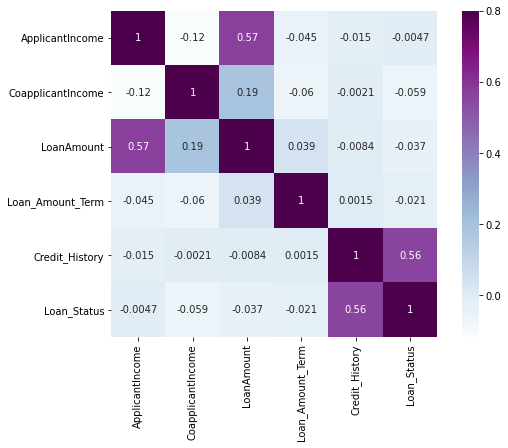

In [ ]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

Missing Value Imputation


In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Log Transformation to remove outliers

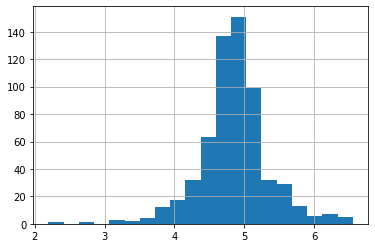

In [ ]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

Model Building

In [ ]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [ ]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,5.231109


In [ ]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8054054054054054

In [ ]:
pred_test = model.predict(test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

cm = confusion_matrix(y_cv, pred_cv)
print(cm)

[[ 29  34]
 [  2 120]]


In [ ]:
np.set_printoptions(precision=2)

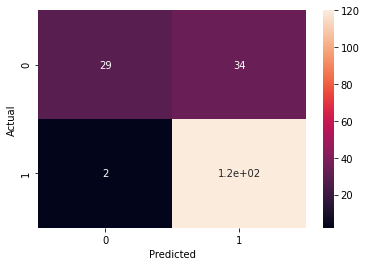

In [ ]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print (classification_report(y_cv,pred_cv))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62        63
           1       0.78      0.98      0.87       122

    accuracy                           0.81       185
   macro avg       0.86      0.72      0.74       185
weighted avg       0.83      0.81      0.78       185



In [ ]:
f1_lr1 = f1_score(y_cv,pred_cv, average='weighted')
f1_lr1

0.7835637672825462

SInce our dataset is imbalanced, we will use stratified k- fold

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
i=1
mean = 0
mean_f1 = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_yvl = model.predict(xvl)
    score=accuracy_score(yvl,pred_yvl)
    mean += score
    print ('accuracy_score',score) 

    f1_acc = f1_score(yvl,pred_yvl, average='weighted')
    mean_f1 += f1_acc
    print ('f1_score',f1_acc)

    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print ('\n Mean Validation Accuracy',mean/(i-1))
print('\n Mean f1 score',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8048780487804879
f1_score 0.7803044195855491

2 of kfold 5 
accuracy_score 0.7642276422764228
f1_score 0.7321778634254691

3 of kfold 5 
accuracy_score 0.7804878048780488
f1_score 0.7478065032911156

4 of kfold 5 
accuracy_score 0.8455284552845529
f1_score 0.83759428772475

5 of kfold 5 
accuracy_score 0.8032786885245902
f1_score 0.7856022808267997

 Mean Validation Accuracy 0.7996801279488205

 Mean f1 score 0.7996801279488205


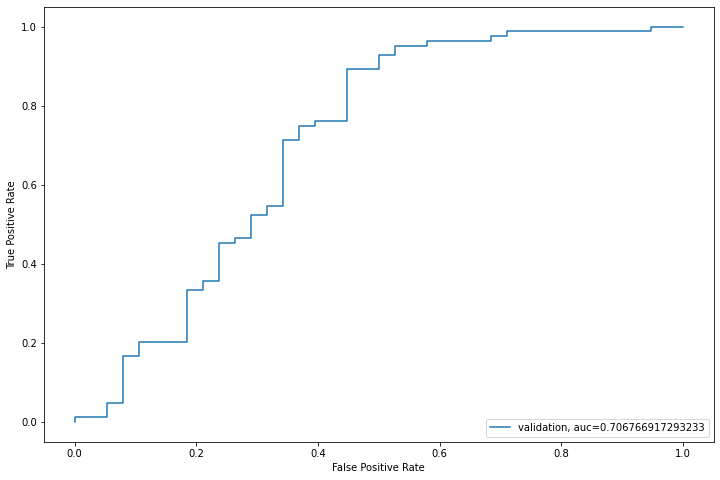

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

SInce our dataset is imbalanced, we will use stratified k- fold

Feature Engineering

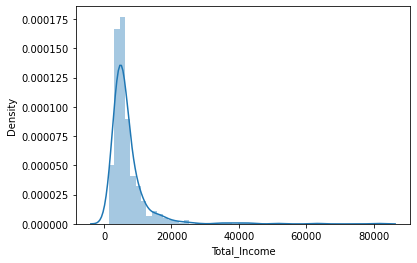

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

sns.distplot(train['Total_Income'])

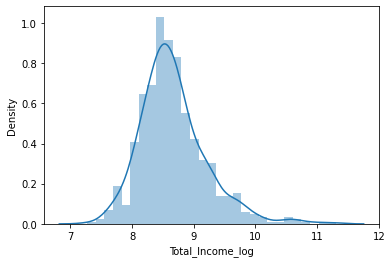

In [ ]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

In [ ]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,5849.0,8.674026,0.355556
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,6091.0,8.714568,0.355556
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,3000.0,8.006368,0.183333
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,4941.0,8.505323,0.333333
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,6000.0,8.699515,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,2900.0,7.972466,0.197222
610,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,4106.0,8.320205,0.222222
611,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,8312.0,9.025456,0.702778
612,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,7583.0,8.933664,0.519444


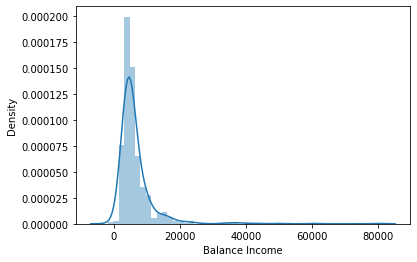

In [ ]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [ ]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

Model Building Part 2


In [ ]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [ ]:
i=1
mean = 0
mean_f1 = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_yvl = model.predict(xvl)
    score=accuracy_score(yvl,pred_yvl)
    mean += score
    print ('accuracy_score',score) 

    f1_acc = f1_score(yvl,pred_yvl, average='weighted')
    mean_f1 += f1_acc
    print ('f1_score',f1_acc)

    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print ('\n Mean Validation Accuracy',mean/(i-1))
print('\n Mean f1 score',mean/(i-1))


1 of kfold 5 
accuracy_score 0.6910569105691057
f1_score 0.5648061288305192

2 of kfold 5 
accuracy_score 0.7804878048780488
f1_score 0.7459375424725017

3 of kfold 5 
accuracy_score 0.7804878048780488
f1_score 0.7599857354355556

4 of kfold 5 
accuracy_score 0.6910569105691057
f1_score 0.5728036940563581

5 of kfold 5 
accuracy_score 0.8114754098360656
f1_score 0.7929770281534662

 Mean Validation Accuracy 0.7509129681460749

 Mean f1 score 0.7509129681460749


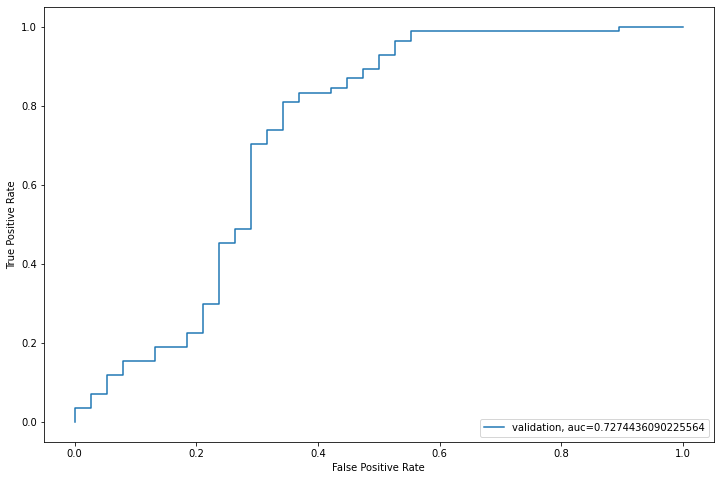

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn import tree

i=1
mean = 0
mean_f1 = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_yvl = model.predict(xvl)
    score=accuracy_score(yvl,pred_yvl)
    mean += score
    print ('accuracy_score',score) 

    f1_acc = f1_score(yvl,pred_yvl, average='weighted')
    mean_f1 += f1_acc
    print ('f1_score',f1_acc)

    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print ('\n Mean Validation Accuracy',mean/(i-1))
print('\n Mean f1 score',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7154471544715447
f1_score 0.7143821613654733

2 of kfold 5 
accuracy_score 0.6422764227642277
f1_score 0.6488201467380528

3 of kfold 5 
accuracy_score 0.7154471544715447
f1_score 0.720978104921714

4 of kfold 5 
accuracy_score 0.7642276422764228
f1_score 0.7664504119788672

5 of kfold 5 
accuracy_score 0.7540983606557377
f1_score 0.7557696105987632

 Mean Validation Accuracy 0.7182993469278955

 Mean f1 score 0.7182993469278955


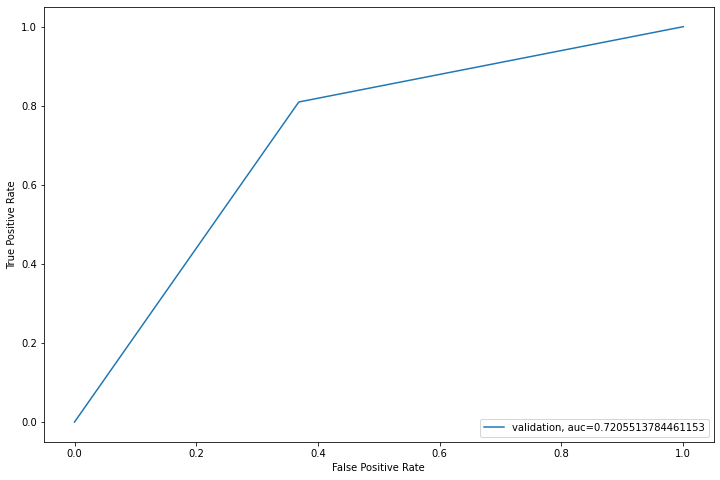

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

i=1
mean = 0
mean_f1 = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_yvl = model.predict(xvl)
    score=accuracy_score(yvl,pred_yvl)
    mean += score
    print ('accuracy_score',score) 

    f1_acc = f1_score(yvl,pred_yvl, average='weighted')
    mean_f1 += f1_acc
    print ('f1_score',f1_acc)

    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print ('\n Mean Validation Accuracy',mean/(i-1))
print('\n Mean f1 score',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7804878048780488
f1_score 0.7623977436052606

2 of kfold 5 
accuracy_score 0.7560975609756098
f1_score 0.7340676632572777

3 of kfold 5 
accuracy_score 0.7886178861788617
f1_score 0.7634164235993057

4 of kfold 5 
accuracy_score 0.7967479674796748
f1_score 0.7863082733220396

5 of kfold 5 
accuracy_score 0.8360655737704918
f1_score 0.8185597840952608

 Mean Validation Accuracy 0.7916033586565374

 Mean f1 score 0.7916033586565374


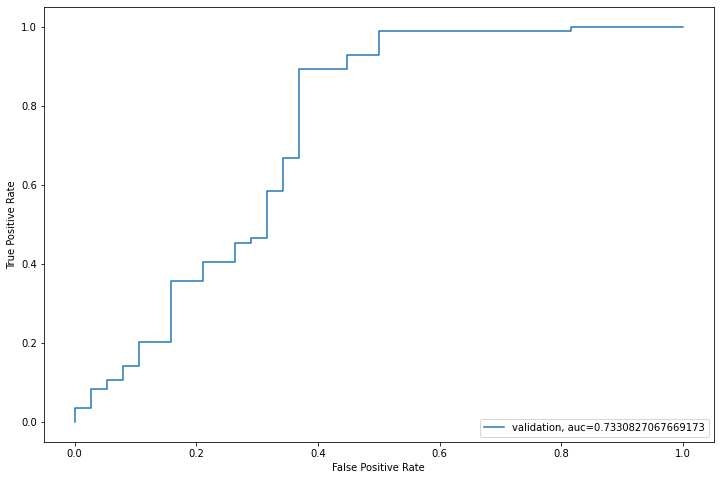

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)


from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)
GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)
i=1
mean = 0
mean_f1 = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=41)
    model.fit(xtr,ytr)
    pred_yvl = model.predict(xvl)
    score=accuracy_score(yvl,pred_yvl)
    mean += score
    print ('accuracy_score',score) 

    f1_acc = f1_score(yvl,pred_yvl, average='weighted')
    mean_f1 += f1_acc
    print ('f1_score',f1_acc)

    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print ('\n Mean Validation Accuracy',mean/(i-1))
print('\n Mean f1 score',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7967479674796748
f1_score 0.7767046237488568

2 of kfold 5 
accuracy_score 0.7723577235772358
f1_score 0.7436884895164741

3 of kfold 5 
accuracy_score 0.7967479674796748
f1_score 0.7705985831788142

4 of kfold 5 
accuracy_score 0.8373983739837398
f1_score 0.8258677298311445

5 of kfold 5 
accuracy_score 0.8278688524590164
f1_score 0.8079249583589024

 Mean Validation Accuracy 0.8062241769958683

 Mean f1 score 0.8062241769958683


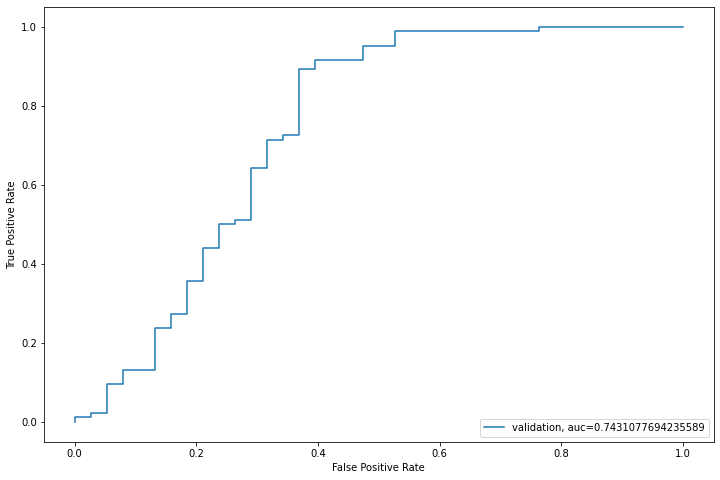

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

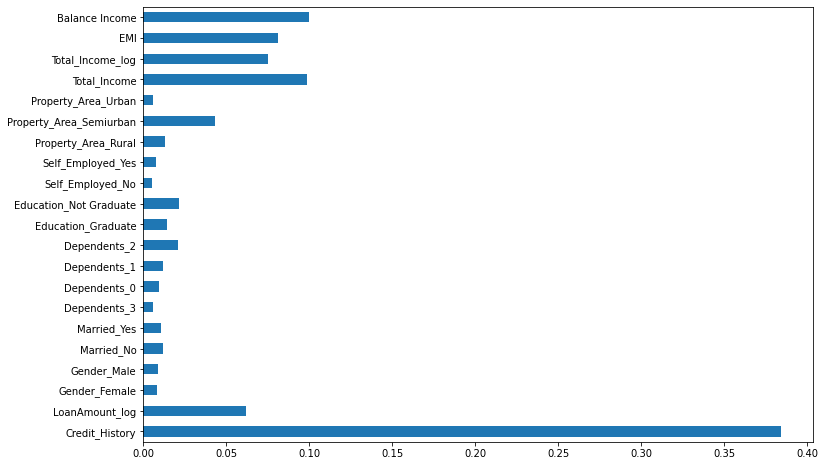

In [ ]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [ ]:
from xgboost import XGBClassifier

i=1
mean = 0
mean_f1 = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(xtr,ytr)
    pred_yvl = model.predict(xvl)
    score=accuracy_score(yvl,pred_yvl)
    mean += score
    print ('accuracy_score',score) 

    f1_acc = f1_score(yvl,pred_yvl, average='weighted')
    mean_f1 += f1_acc
    print ('f1_score',f1_acc)

    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print ('\n Mean Validation Accuracy',mean/(i-1))
print('\n Mean f1 score',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7967479674796748
f1_score 0.7767046237488568

2 of kfold 5 
accuracy_score 0.7642276422764228
f1_score 0.7367832408482814

3 of kfold 5 
accuracy_score 0.7886178861788617
f1_score 0.7634164235993057

4 of kfold 5 
accuracy_score 0.8130081300813008
f1_score 0.8034036114562763

5 of kfold 5 
accuracy_score 0.8032786885245902
f1_score 0.7822717409143128

 Mean Validation Accuracy 0.7931760629081701

 Mean f1 score 0.7931760629081701


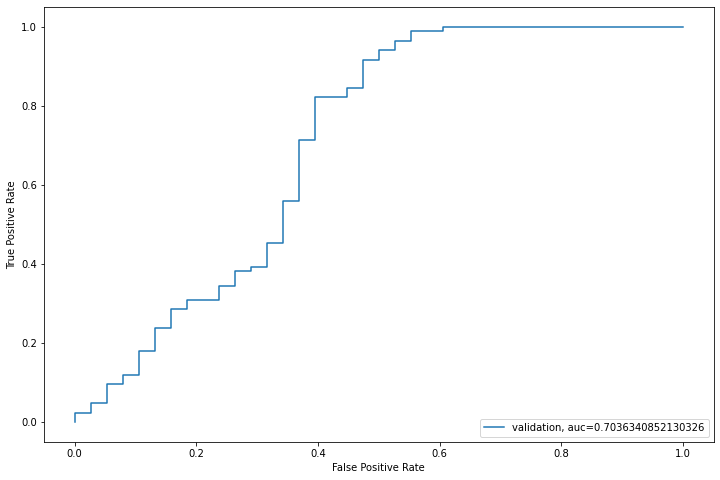

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
best_score = 0.0
acc_list=[]

for k in range(3,50):
    
    clf_knn = KNeighborsClassifier(n_neighbors = k, algorithm='auto')
    
    # using 10-fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, X, y, cv=10)
    score = scores.mean()
    acc_list.append(score)
    
    if score > best_score:
        best_score=score
        best_clf = clf_knn
        best_k = k
        
print("Best K is :",best_k,"| Cross validation Accuracy :",best_score)
clf_knn = best_clf

Best K is : 32 | Cross validation Accuracy : 0.6987308302485458


In [ ]:
i=1
mean = 0
mean_f1 = 0
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = KNeighborsClassifier(n_neighbors = 32)
    model.fit(xtr,ytr)
    pred_yvl = model.predict(xvl)
    score=accuracy_score(yvl,pred_yvl)
    mean += score
    print ('accuracy_score',score) 

    f1_acc = f1_score(yvl,pred_yvl, average='weighted')
    mean_f1 += f1_acc
    print ('f1_score',f1_acc)

    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print ('\n Mean Validation Accuracy',mean/(i-1))
print('\n Mean f1 score',mean/(i-1))


1 of kfold 5 
accuracy_score 0.6829268292682927
f1_score 0.5746579417013683

2 of kfold 5 
accuracy_score 0.6910569105691057
f1_score 0.5648061288305192

3 of kfold 5 
accuracy_score 0.6991869918699187
f1_score 0.5906008328375967

4 of kfold 5 
accuracy_score 0.6829268292682927
f1_score 0.5542594556380346

5 of kfold 5 
accuracy_score 0.6885245901639344
f1_score 0.5615151997453446

 Mean Validation Accuracy 0.6889244302279088

 Mean f1 score 0.6889244302279088


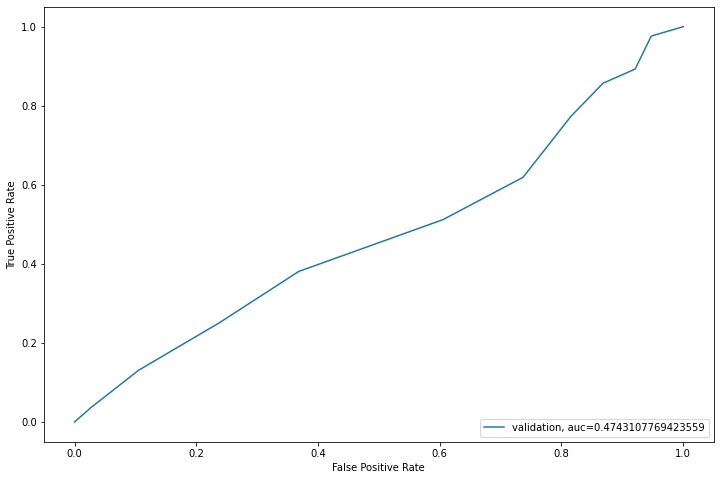

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()